In [2]:
import numpy as np
from scipy.optimize import fmin
from scipy.optimize import minimize
import pdb
from numpy.linalg import pinv as inv 
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [3]:
    proc = subprocess.Popen(['/bin/bash'], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    proc.communicate('./scripts/getexpert.sh -hmmdir models/htk -labdir original/lab -stream 1 -dimension '+str(1) +' -outdir expts  -filename utt'+str(1))

('', None)

In [4]:
durationFile = "expts/utt1.dur.expt"

In [5]:
def retDur(durationFile):
    durations =[]
    with open(durationFile, 'r') as f:
        lines = f.read().splitlines()
        for row in lines:
            moment = row.split()
            if len(moment)==10:
                for i in range(5):
                    durations.append(int(round(float(moment[i]))))
    return durations

In [6]:
def meansAndVar(uttfile, durations):
    with open(uttfile, "r") as f:
        means=[]
        var = []
        T = sum(durations)
        lines = f.read().splitlines()
        for line in lines:
            expts = line.split()
            if len(expts)==6:
                means.append(expts[0:3])
                var.append(expts[3:6])
        
    meansFinal = np.zeros(T * 3)
    varFinal = np.zeros(T * 3)
    
    frame = 0
    
    for i in range(len(durations)):
        for t in range(durations[i]):
            meansFinal[frame:frame+3] = means[i]
            varFinal[frame:frame+3] = var[i]
            frame+=3
    
    varFinal = np.diag(varFinal)
    
    
    
    return (meansFinal, varFinal)

In [7]:
durations = retDur(durationFile)

In [8]:
uttfile = "expts/utt1.cmp.expt"

In [9]:
def meansAndVar(uttfile, durations):
    with open(uttfile, "r") as f:
        means=[]
        var = []
        T = sum(durations)
        lines = f.read().splitlines()
        for line in lines:
            expts = line.split()
            if len(expts)==6:
                means.append(expts[0:3])
                var.append(expts[3:6])
        
    meansFinal = np.zeros(T * 3)
    varFinal = np.zeros(T * 3)
    
    frame = 0
    
    for i in range(len(durations)):
        for t in range(durations[i]):
            meansFinal[frame:frame+3] = means[i]
            varFinal[frame:frame+3] = var[i]
            frame+=3
    
    varFinal = np.diag(varFinal)
    
    
    
    return (meansFinal, varFinal)

In [10]:
means, var = meansAndVar(uttfile, durations)

In [11]:
def weightMate(durations):
    T = sum(durations)
    window = np.array([[0.0,0.0,1.0,0.0,0.0],[-0.2,-0.1,0.0,0.1,0.2],[0.285714,-0.142857,-0.285714,-0.142857,0.285714]])
    
    W = np.zeros([3*T,T])  
    frame = 0
    counter = 0
    for i in range(T):
        if i==0:
            W[frame:frame+3,0:3]= window[:,2:]
            
        elif i==1:
            W[frame:frame+3,0:4]= window[:,1:]
        
        elif frame>=1533:
            W[frame:frame+3, counter:counter+T-i+2] = window[:,:T-i+2]
            counter+=1
        else:
            
            W[frame:frame+3, counter:counter+5] = window
            counter+=1
        frame+=3
        
        
    
    return W

In [12]:
W = weightMate(durations)

In [13]:
def traj(W, means, var):
    varinv = np.linalg.pinv(var)
    varMaj = np.linalg.pinv(np.dot(np.dot(np.transpose(W),varinv),W))
    mu = np.dot(np.dot(np.dot(varMaj, np.transpose(W)),varinv),means)
    return mu, varMaj

In [14]:
trajmeans, trajvar = traj(W, means, var)

In [79]:
gmu=float(gmeans[1])
gvar = float(gsig[1])
mu = trajmeans
P = inv(trajvar)
trajvarinv = inv(trajvar)
b = np.dot(P,mu)
lambda_init = np.random.random()

J = np.eye(T) - (1/float(T))*np.ones(T)

T = sum(durations)
I = np.identity(T)
onevec = np.ones(T)

In [55]:
gvarmean = subprocess.check_output(['./bin/x2x', '+da', 'models/hts/gv-mcep.pdf'])
gvarmean= gvarmean.split()

gmeans = gvarmean[0:60]
gsig = gvarmean[60:120]

In [56]:
gmu

0.970492

In [57]:
        proc = subprocess.Popen(['/bin/bash'], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
        proc.communicate('./scripts/getexpert.sh -hmmdir models/htk -labdir original/lab -stream 1 -dimension '+str(1)+' -outdir expts  -filename utt'+str(1))



('', None)

In [80]:
def trajfunction(lambda_):
    
    alpha = 3*T
    x = cGen(lambda_)
    mat= inv(P-lambda_*I)
    
    orig = (1/2)*np.dot(np.dot(np.transpose(x - trajmeans),trajvarinv), (x-trajmeans))
    #globvar = (alpha/2) *(x.var()-gmu )**2/gvar
    v =  lambda_ * np.dot( np.dot(np.transpose(b), mat), onevec)/ (T + lambda_ *np.dot(np.transpose(onevec), np.dot(mat, onevec)))
    globvar = (alpha/2) *(x.var()-gmu )**2/gvar

    print (orig+globvar)
    return (orig+globvar)

In [81]:
import subprocess


In [82]:
def cGen(lambda_):
    
    mat= inv(P-lambda_*I)
    
    v = lambda_ * np.dot( np.dot(np.transpose(b), mat), onevec)/ (T + lambda_ *np.dot(np.transpose(onevec), np.dot(mat, onevec)))

    c = np.dot(mat, b - v* onevec)
    return c

In [83]:
minimum = minimize(trajfunction, lambda_init, tol= 10e-6)

90979.40419179751
90979.40660759511
90979.40419179751
19828.561302336442
19828.561302336442
19828.561710744983
14939.749975501963
14939.749975501963
14939.750281754108
7660.8436537035095
7660.8436537035095
7660.843815552728
3442.7549072954807
3442.7549072954807
3442.7549881445298
1356.477153725488
1356.477153725488
1356.4771929066371
426.6288473749029
426.6288473749029
426.62886502433935
94.42339223863425
94.42339223863425
94.42339927490427
11.424786615982482
11.424786615982482
11.424788822193598
0.4823164703986104
0.4823164703986104
0.48231690333397437
0.0032808705772770634
0.0032808705772770634
0.0032809058899145255
1.0594632431460265e-06
1.0594632431460265e-06
1.06009728357839e-06
1.9233774708610843e-12
1.9233774708610843e-12
2.872363932580478e-12
2.3698608363491802e-14
2.3698608363491802e-14
2.371636087109086e-14


In [84]:
lambda_ = lambda_init

In [78]:
J

array([[ 0.99805068, -0.00194932, -0.00194932, ..., -0.00194932,
        -0.00194932, -0.00194932],
       [-0.00194932,  0.99805068, -0.00194932, ..., -0.00194932,
        -0.00194932, -0.00194932],
       [-0.00194932, -0.00194932,  0.99805068, ..., -0.00194932,
        -0.00194932, -0.00194932],
       ...,
       [-0.00194932, -0.00194932, -0.00194932, ...,  0.99805068,
        -0.00194932, -0.00194932],
       [-0.00194932, -0.00194932, -0.00194932, ..., -0.00194932,
         0.99805068, -0.00194932],
       [-0.00194932, -0.00194932, -0.00194932, ..., -0.00194932,
        -0.00194932,  0.99805068]])

In [85]:
lambda_opt = minimum.x[0]

In [86]:
lambda_opt

-3.9805613963470763

In [87]:
trajopt = cGen(lambda_opt)

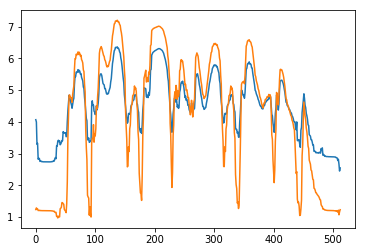

In [88]:
plt.plot(trajopt)
plt.plot(trajmeans)
plt.show()

In [27]:
with open("trajCustom/dim1/gvconstrain.txt", "w+") as f:
    f.write(str(trajopt))

In [63]:
trajopt

array([0.02512384, 0.2972832 , 0.9103574 , 0.87480176, 0.98382406,
       0.99288134, 0.98812965, 1.02107607, 1.01572598, 1.02312411,
       1.03009438, 1.02884308, 1.0329033 , 1.03381815, 1.03416436,
       1.03546361, 1.03543194, 1.03571242, 1.03589894, 1.03551565,
       1.03549415, 1.03491768, 1.03383424, 1.03364062, 1.03088864,
       1.02912372, 1.02781855, 1.01828249, 1.01896303, 1.00747946,
       0.98480404, 0.99741407, 0.93302717, 0.91596247, 0.92638162,
       0.67085347, 0.68744284, 0.54229553, 0.56225039, 0.61665716,
       0.55043078, 0.90235653, 0.91362897, 0.92364917, 1.08760958,
       1.07463009, 0.92995598, 0.91771864, 0.66316666, 0.65269015,
       0.57322904, 0.55283776, 0.94402438, 1.53826783, 3.26580039,
       4.03624835, 4.79506117, 4.83365586, 4.77251914, 4.80400716,
       4.75754691, 4.66689241, 4.91794947, 5.06950405, 5.19784987,
       5.7240111 , 6.06072378, 6.05766508, 6.19859004, 6.17298263,
       6.19844502, 6.26781443, 6.18907526, 6.26060482, 6.21954